# Árboles de decisión y bosques aleatorios en Python

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtener los datos

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

## Análisis exploratorio de datos

Simplemente lo revisaremos con un pairplot simple para este pequeño conjunto de datos.

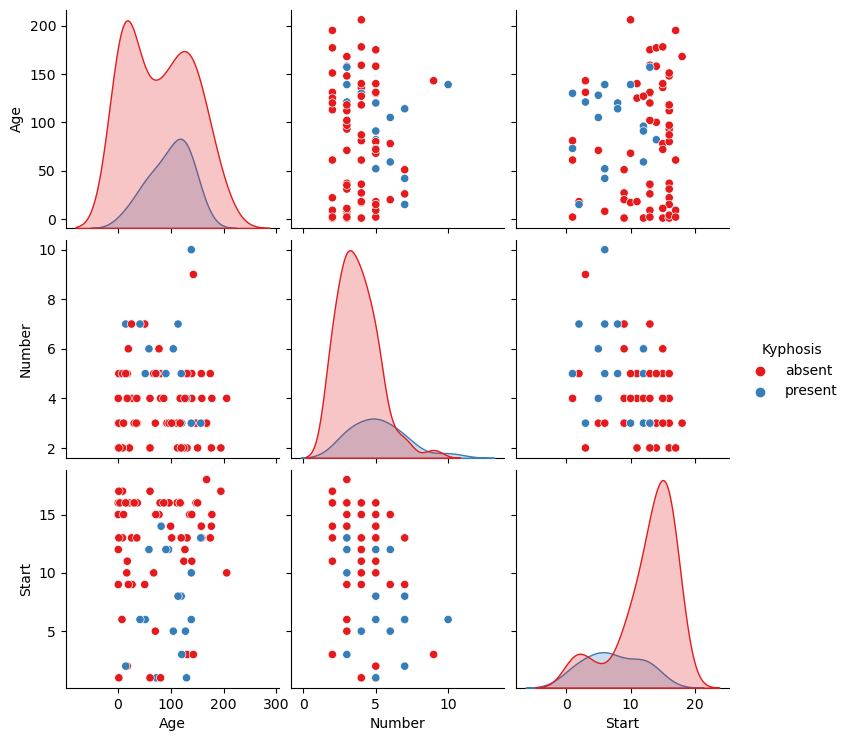

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## División en Conjunto de entrenamiento y de prueba

¡Dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba!

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Árboles de decisión

Comenzaremos simplemente entrenando un solo árbol de decisión.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Predicción y Evaluación¶
Evaluemos nuestro árbol de decisiones.

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [17]:
print(confusion_matrix(y_test,predictions))

[[12  5]
 [ 6  2]]


Importancia de las características

In [18]:
dtree.feature_importances_

array([0.5086415 , 0.26724502, 0.22411348])

In [20]:
importancia = pd.DataFrame(index=X.columns,
                         data = dtree.feature_importances_,
                         columns=['Importancia de la característica'])

In [21]:
print(importancia)

        Importancia de la característica
Age                             0.508641
Number                          0.267245
Start                           0.224113


## Visualización de árbol (con instalaciones más engorrosas)

Scikit learn en realidad tiene algunas capacidades de visualización incorporadas para los árboles de decisión, no las usará con frecuencia y requiere que instale la biblioteca pydot, aquí hay un ejemplo de cómo se ve y el código para ejecutarlo:

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Visualización de árbol con plot_tree

In [22]:
from sklearn.tree import plot_tree

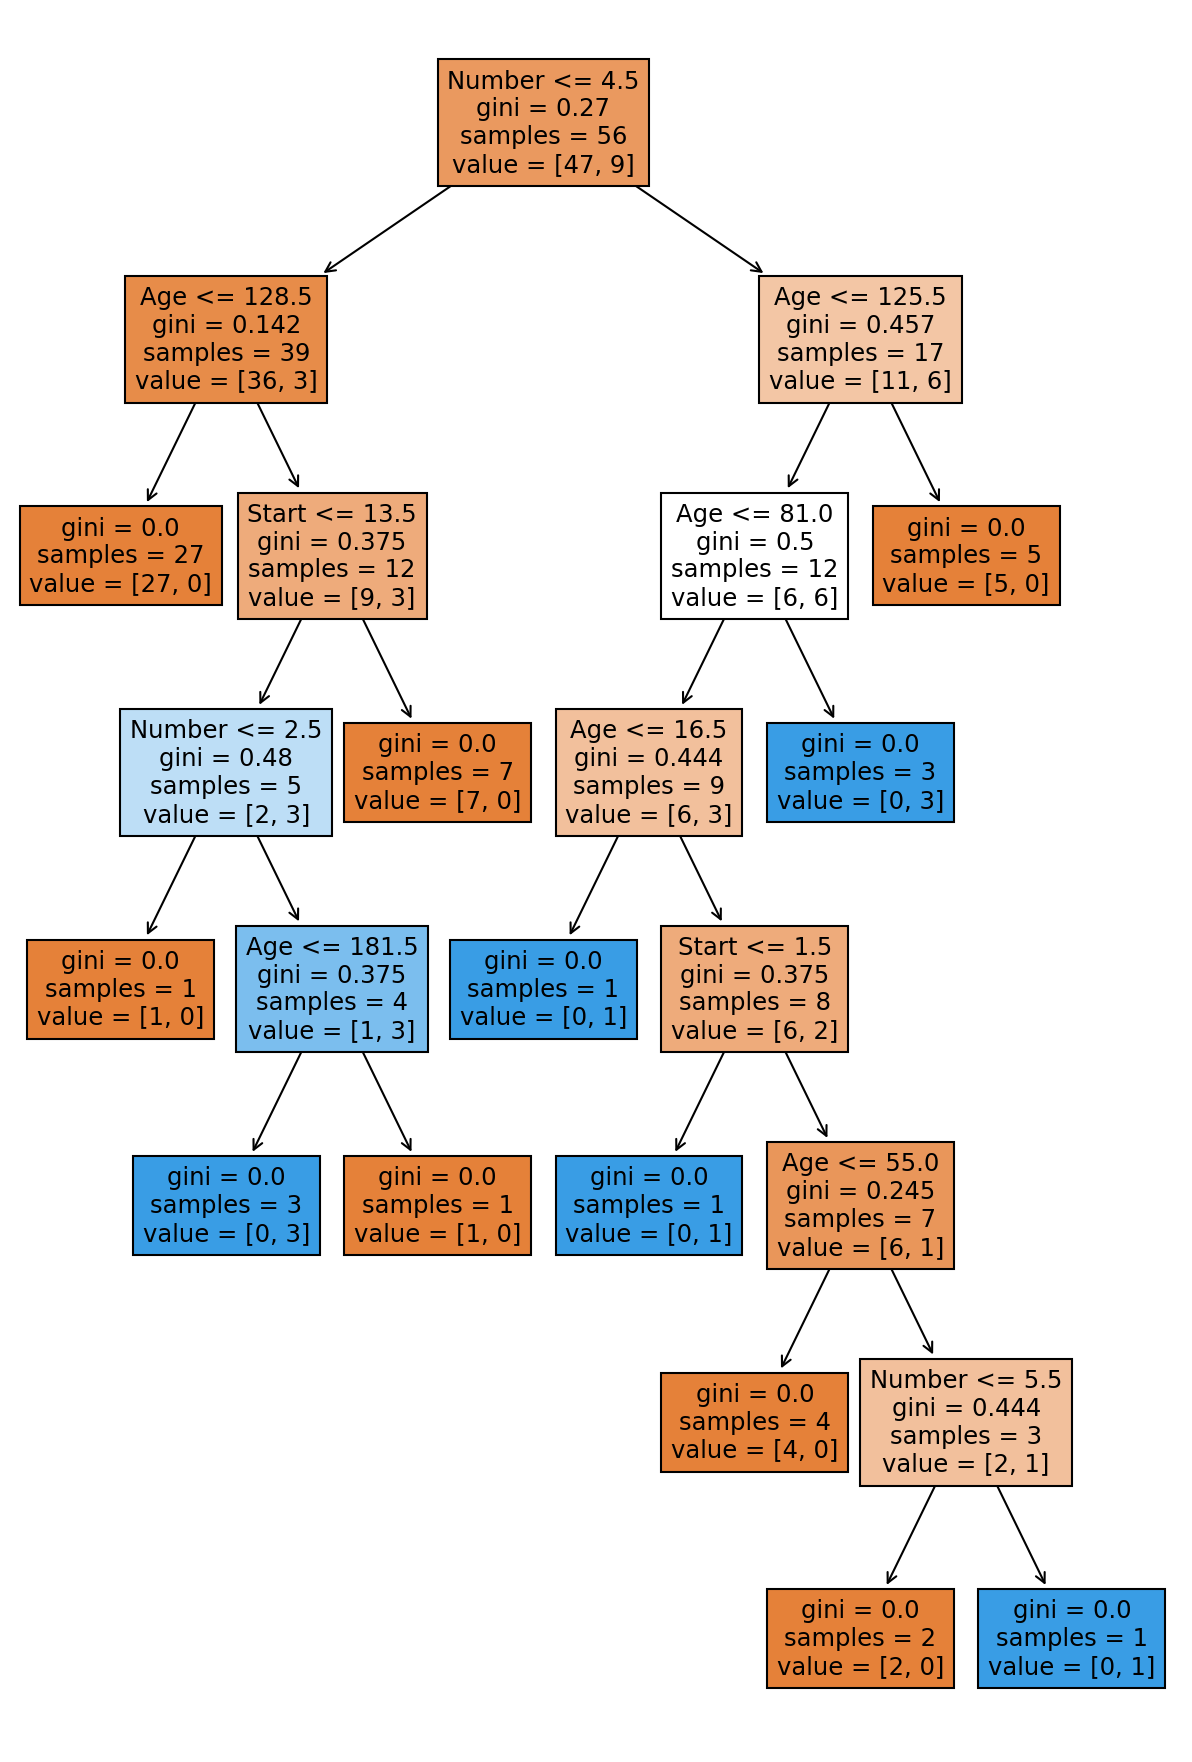

In [25]:
plt.figure(figsize=(10,15),dpi=150)
#plot_tree(dtree);
plot_tree(dtree,feature_names=list(X.columns),filled=True);

In [26]:
X_train.shape

(56, 3)

In [27]:
X_test.shape

(25, 3)

## Bosques Aleatorios

Ahora comparemos el modelo de árbol de decisión con un bosque aleatorio.


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



# ¡Buen trabajo!